# PyROA Basics

## A Brief Introduction to PyROA

PyROA is the third method in pyPetal to find the correlation between two light curves, namely the "continuum" and a "line". PyROA uses the running optimal average (ROA) technique to find a model for the driving (i.e. continuum) light curve, then scales and shifts this driving light curve to obtain the line light curves.

For more information on the ROA method, see the [PyROA code](https://github.com/FergusDonnan/PyROA) and corresponding paper <cite data-cite="donnan_bayesian_1990">Donnan et al. (2021)</cite>.

PyROA will adjust the number of parameters used to describe it's driving light curve by using a "sliding window" technique. When modeling the driving light curve, a window function is used to prescribe how much influence a single data point has on the points around it.

The window function is described by its width $\Delta$. The lower $\Delta$ is, the more flexible the model is allowed to be, and will overfit the data. The higher $\Delta$ is, the less flexible the model will be. In general, as $\Delta \rightarrow \infty$ the model will approach a constant (the optimal average).

This driving light curve is then scaled (with an RMS $A_i$ and a mean $B_i$) and shifted (with a time delay $\tau_i$) for each light curve. In addition, extra variance $\sigma_i$ can be added per light curve to aid with the fitting.

We can either fit all light curves together in the same MCMC sampler, or separately fit each line to the continuum. By default pyPetal will fit all lines together, but this can be changed (see the PyROA together tutorial).

## PyROA Arguments

* ``nchain``: The number of samples to use for the MCMC. Default is 20000.

* ``nburn``: The number of samples to discard as burn-in. Default is 15000.

* ``together``: Whether or not to fit all light curves together. Default is ``True``.

* ``init_tau``: The inital values to give the MCMC for $\tau_i$. Must be an array of $\tau_i$, one for each line. If ``None``, it will be set to 10. for each line. Default is ``None``.

* ``subtract_mean``: Whether or not to subtract the mean of the light curves before running PyROA. Default is ``True``.

* ``div_mean``: Whether or not to divide the light curves by their means. If ``subtract_mean=True``, this will occur before. Default is ``False``.

* ``add_var``: Whether or not to add the extra variance parameter $\sigma_i$. Default is ``False``.

* ``delay_dist``: Whether or not to add a delay distribution (as described in PyROA, and in the ``delay_dist`` tutorial). Can be input as a single value or a list of values if ``together=False`` (one for each line). If ``together=False`` and one value is given, it will be assumed for all lines. Default is ``True``.

* ``psi_types``: The type of distribution(s) to use for the delay distribution. This only affects the output if ``delay_dist=True``. Multiple values may be given, one for each line. If one value is given, it will be assumed for each line, If ``None``, a Gaussian distribution will be assumed. Default is ``None``.

* ``objname``: The name of the object, used for file-naming and plotting purposes only. If ``None``, this will be set to "pyroa". Default is ``None``.

## Saving Light Curves

To run, PyROA needs to have all files in a certain format in the same directory. The PyROA module will therefore save all light curves again into a new subdirectory ``output_dir/pyroa_lcs``. These files will be named ``(objname)_(line).dat``, where ``(objname)`` is input into the PyROA module, and ``(line)`` is the name of each line. 

If ``subtract_mean=True`` or ``div_mean=True``, these actions will be performed before saving into ``pyroa_lcs/``.

## A Basic Example

Here, we'll run PyROA on an example set of light curves (specifically the JAVELIN test ones):

In [1]:
%matplotlib inline
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
line_names = ['continuum', 'yelm', 'zing']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'pyroa_output1/'


Running PyROA
----------------
nburn: 10000
nchain: 15000
init_tau: [10.0, 100.0]
subtract_mean: True
div_mean: False
add_var: True
delay_dist: False
psi_types: ['Gaussian', 'Gaussian']
together: True
objname: jav
----------------
        
Initial Parameter Values
     A0           B0    σ0       A1           B1    τ1    σ1      A2          B2    τ2    σ2    Δ
-------  -----------  ----  -------  -----------  ----  ----  ------  ----------  ----  ----  ---
2.30824  7.53021e-16  0.01  1.19302  4.11909e-16    10  0.01  0.5882  3.6042e-16   100  0.01   10
NWalkers=26


  0%|          | 0/15000 [00:00<?, ?it/s]/home/stone28/miniconda3/envs/pypetal_test/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 15000/15000 [1:19:31<00:00,  3.14it/s]


Filter: continuum
Delay, error: 0.00 (fixed)
Filter: yelm
Delay, error:  100.14350  (+   1.01091 -   1.00455)
Filter: zing
Delay, error:  249.89699  (+   0.84217 -   0.76778)


Best Fit Parameters
     A0           B0       σ0       A1        B1       τ1        σ1        A2         B2       τ2         σ2        Δ
-------  -----------  -------  -------  --------  -------  --------  --------  ---------  -------  ---------  -------
2.29901  -0.00829763  0.33501  1.17048  -0.13437  100.143  0.175318  0.594859  0.0367468  249.897  0.0797189  11.4592


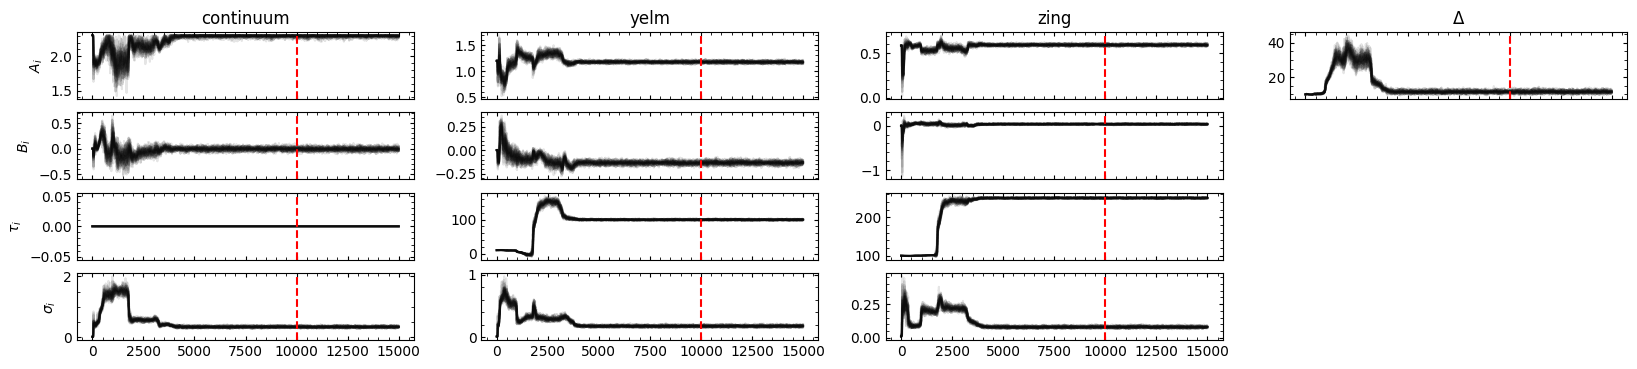

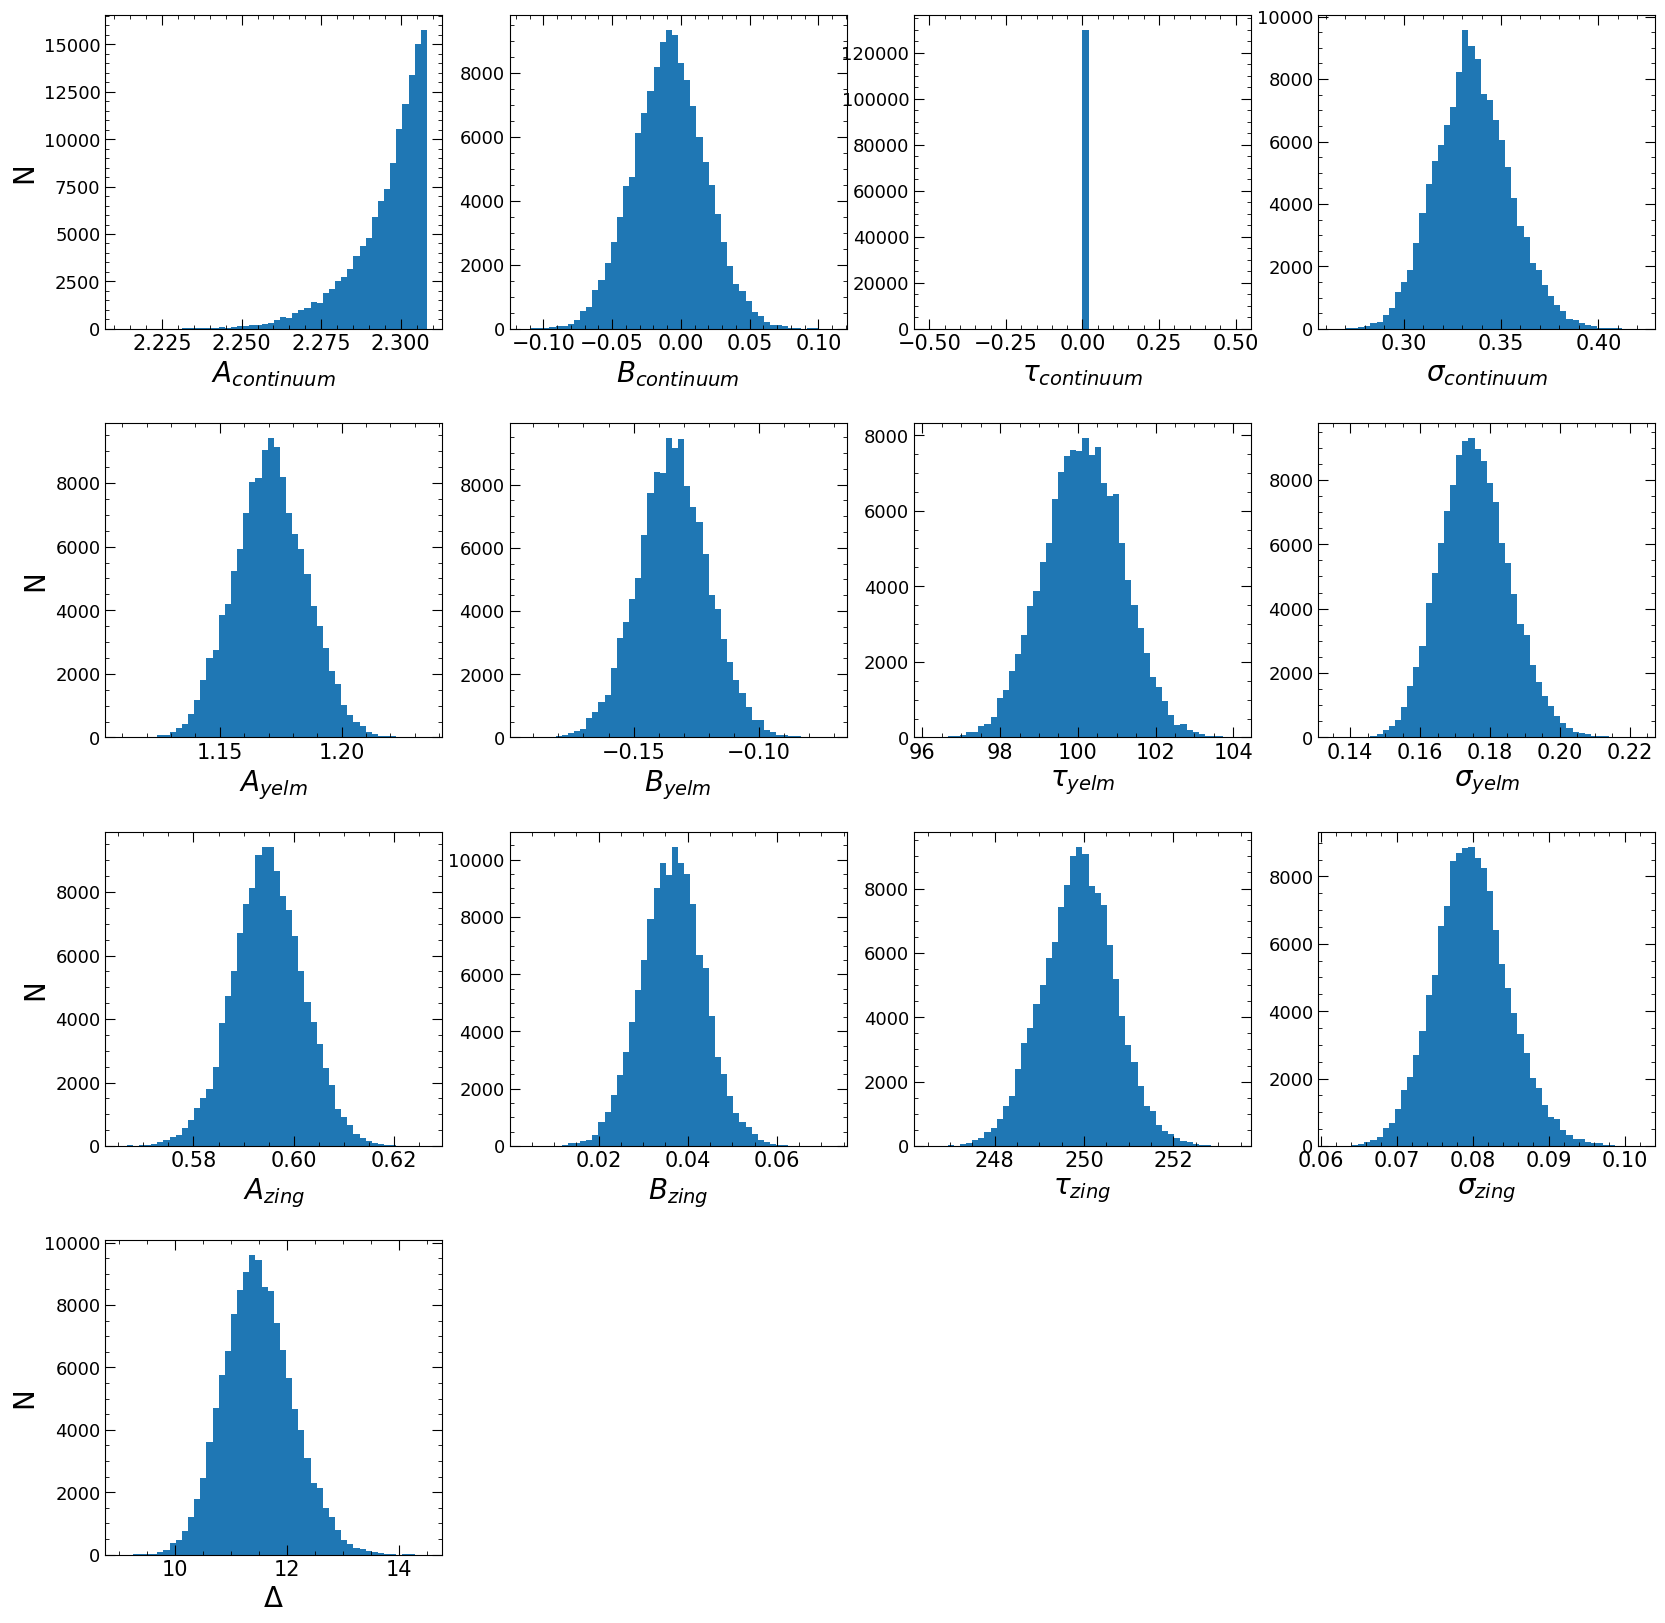

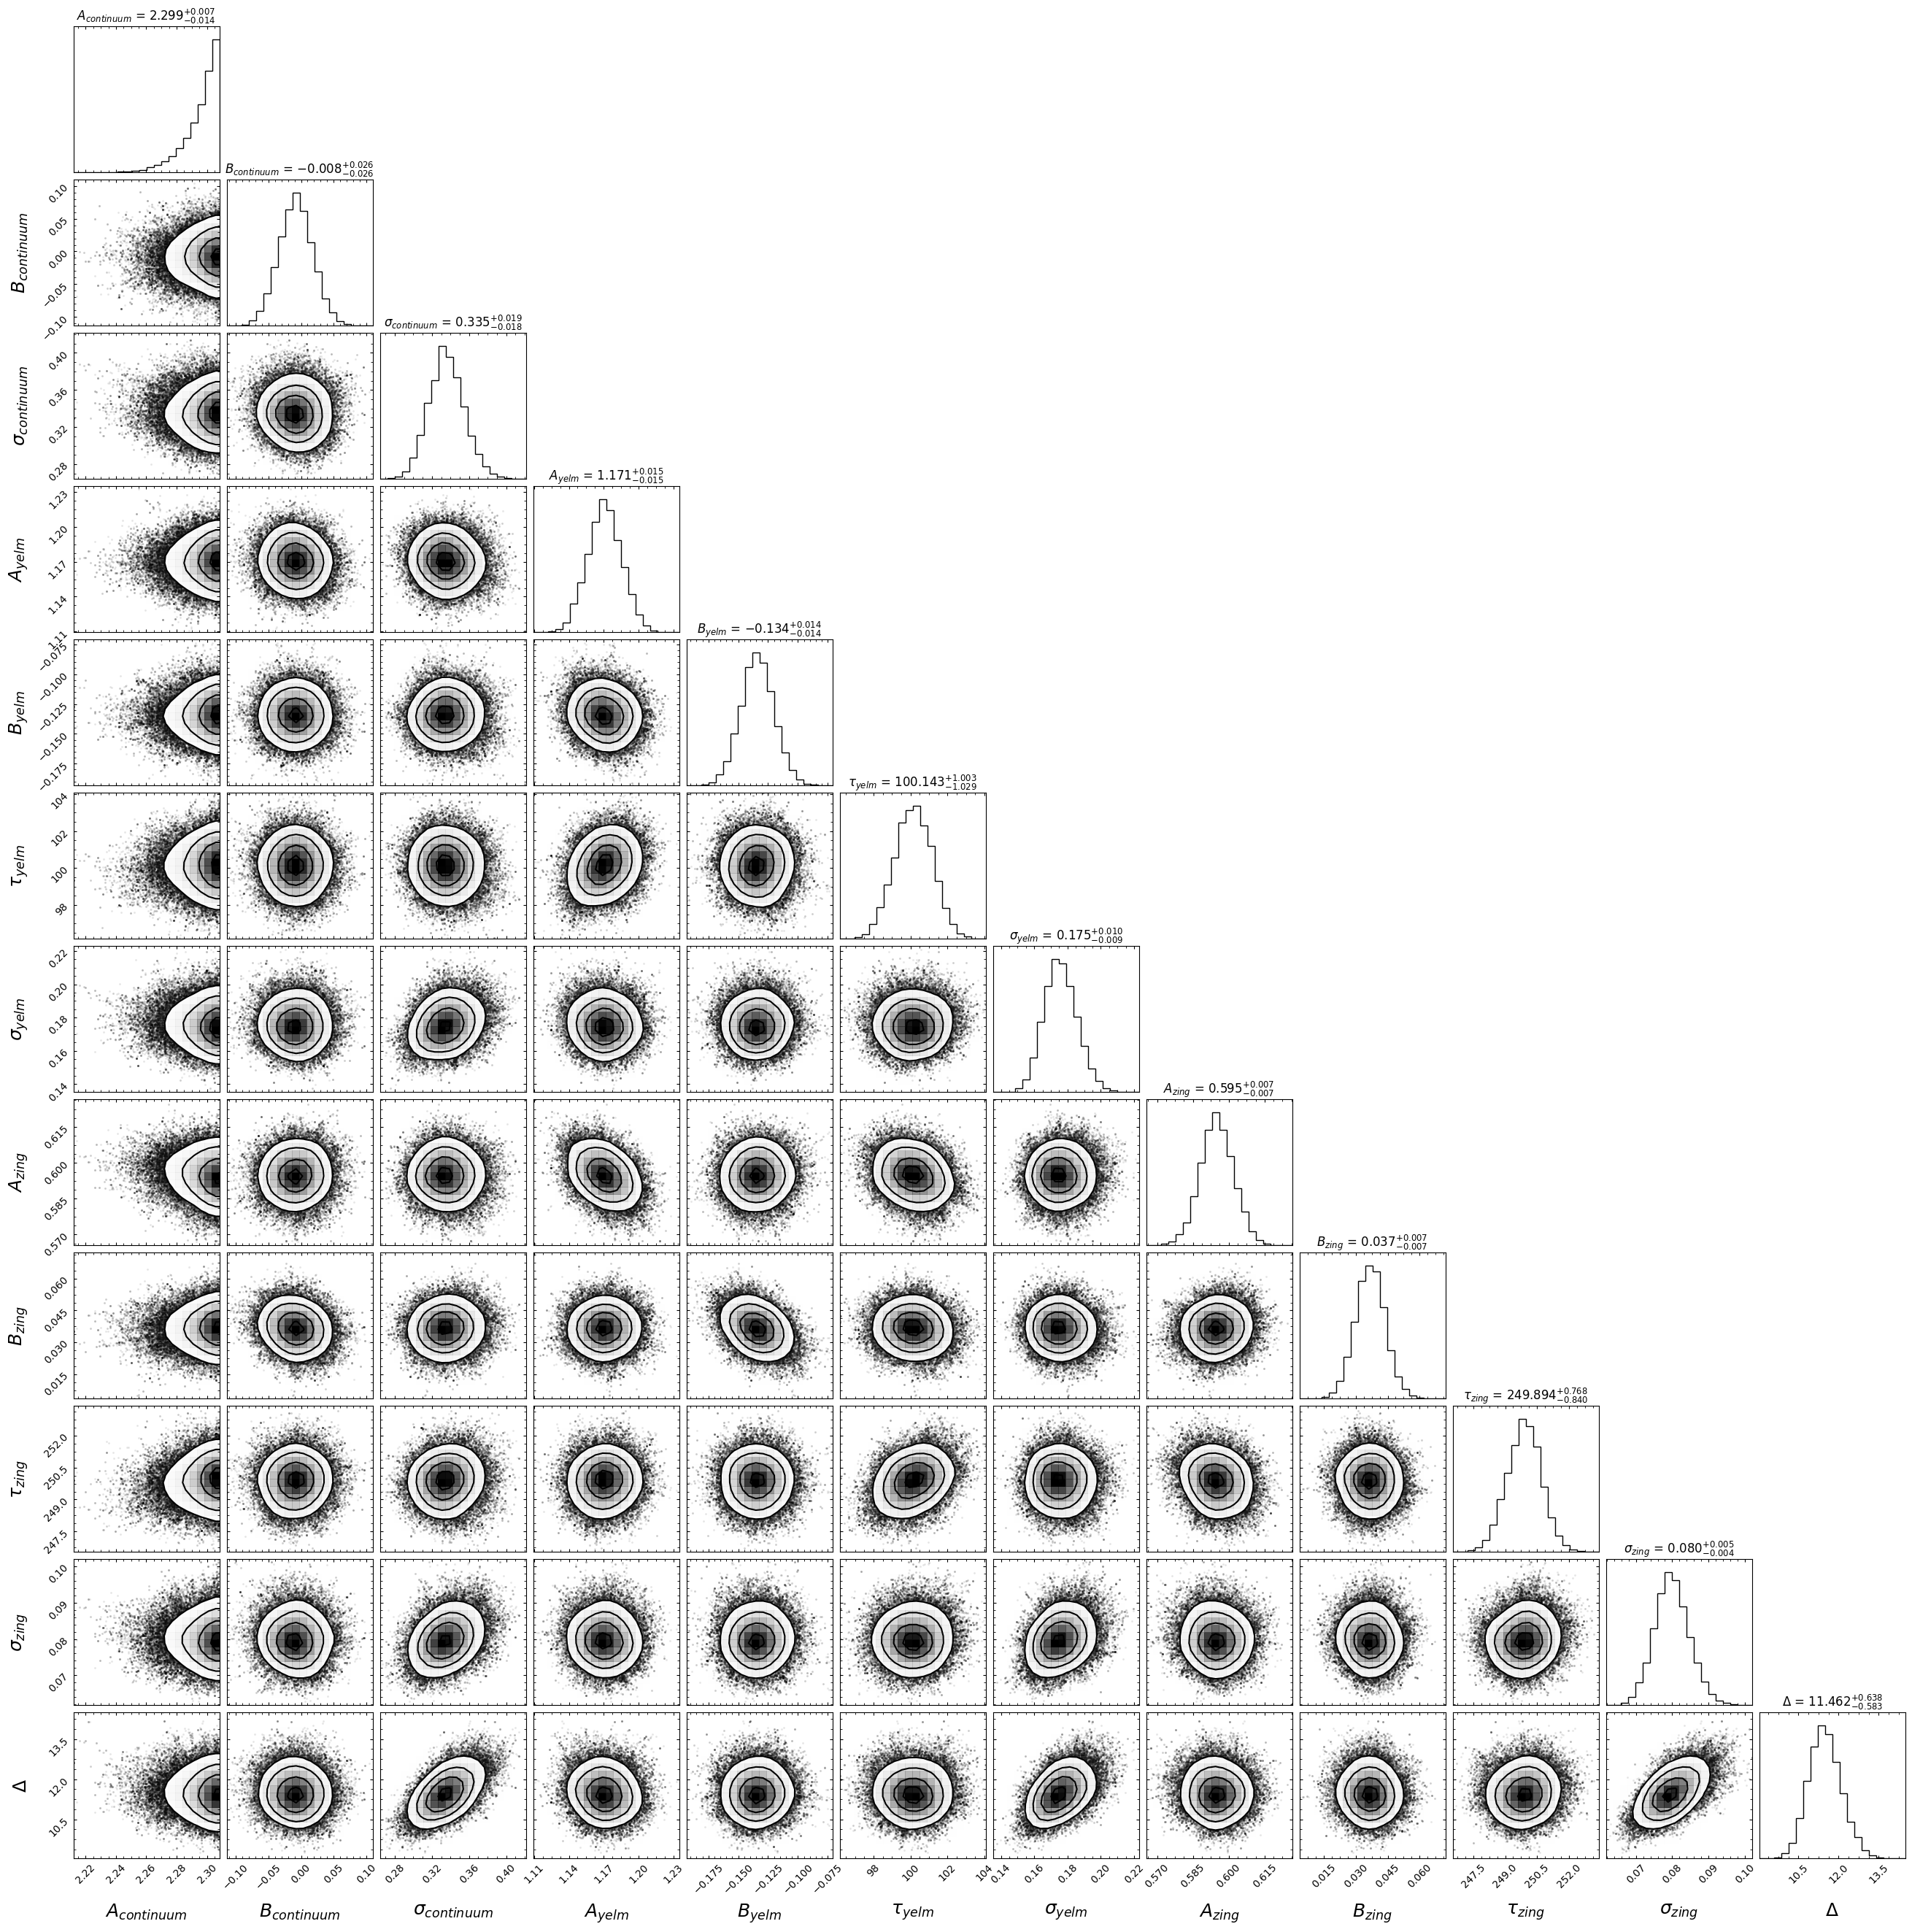

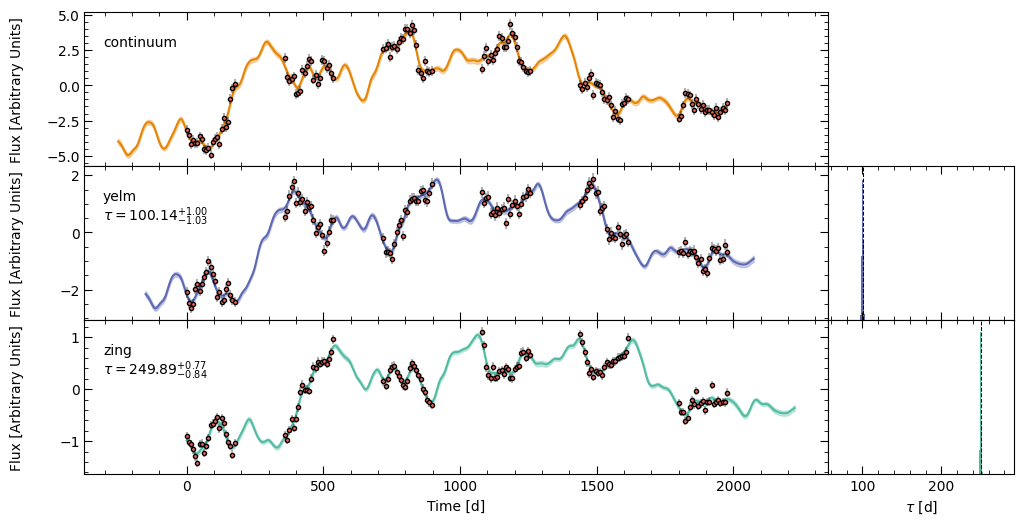

In [2]:
params = {
    'nchain': 15000,
    'nburn': 10000,
    'add_var': True,
    'init_tau': [10., 100.],
    'subtract_mean': True,
    'delay_dist': False,
    'objname': 'jav'
}

res = pl.run_pipeline(output_dir, filenames, line_names,
                      run_pyroa=True, pyroa_params=params,
                      verbose=True, plot=True, time_unit='d',
                      file_fmt='ascii', lag_bounds=[-500, 500])

There were a number of figures output after PyROA was run: 
* A trace plot to show the paths of the walkers
* A histogram plot of the posterior distributions for the parameters
* A corner plot of the parameters
* A plot showing the model fits to each light curve and the corresponding time delay distributions

## PyROA Output Files

In this case, ``together=True``, so there will be one directory with all PyROA data and figures: ``output_directory/pyroa/``. If ``together=False``, there will be a ``pyroa/`` subdirectory for each line (which we'll see in the ``together`` tutorial).

The output files from PyROA are the same as in PyROA itself, in addition to a number of figures:

* ``samples.obj``: The MCMC samples.
* ``samples_flat.obj``: The flattened MCMC samples (with burn-in removed).
* ``Lightcurve_models.obj``: The model fits for each of the light curves (including the continuum).
* ``X_t.obj``: The driving light curve model.

* ``trace_plot.pdf``: A plot showing the trace of the walkers of the MCMC. This will highlight the burn-in samples cut with a red vertical line.
* ``histogram_plot.pdf``: A plot showing the posterior distributions of each parameter (after removing burn-in).
* ``corner_plot.pdf``: A corner plot showing the posterior distributions of each parameter (after burn-in).
* ``fits_plot.pdf``: A plot showing the model fits to each light curve, as well as the time delay $\tau$ distribution, for each light curve.

The output "_.obj" files are stored as pickle files and can be access with the ``pickle`` module.

## PyROA Output

PyROA normally outputs a ``PyROA.PyROA.Fit`` object from its fitting process. However, due to threading issues, this isn't possible in pyPetal. To circumvent this, pyPetal has a similar ``MyFit`` class with similar attributes to access the data.

Since ``together=True`` for this example, there will only be one output ``MyFit`` object in the "pyroa_res" key in the output pyPetal dictionary. If ``together=False``, there would be an array of ``MyFit`` objects, one per line.

The ``MyFit`` class has the following attributes:

* ``samples``: The data from samples.obj

* ``samples_flat``: The data from samples_flat.obj

* ``models``: The data from Lightcurve_models.obj

* ``t``: The times from the driving light curve model in X_t.obj

* ``X``: The values of the driving light curve model in X_t.obj

* ``X_errs``: The error in the driving light curve model in X_t.obj

## Accessing the MCMC Samples

To make accessing the MCMC samples easier, PyROA has a ``get_samples_chunks`` method. This will split ("chunk") up the MCMC samples into parameters by the light curve they are associated with (in order).

In this example, it would split the parameters up as:

$[[A_0, B_0, \tau_0, \sigma_0], [A_1, B_1, \tau_1, \sigma_1], [A_2, B_2, \tau_2, \sigma_2], [\Delta]]$

where $\tau_0$ is an array of 0s.

In [8]:
from pypetal.pyroa.utils import get_samples_chunks

samples_chunks = get_samples_chunks(res['pyroa_res'].samples, nburn=10000, add_var=True)

#3 light curves + Delta
print( len(samples_chunks) )

#tau_0 is set to 0
print( samples_chunks[0][2] )

#Each light curve has 4 parameters
print( len(samples_chunks[1]) )

4
[0. 0. 0. ... 0. 0. 0.]
4


.. warning:: If using the flattened samples in ``samples_flat.obj`` - in addition to being flattened, the MCMC samples are also thinned by a factor of 15.